<a href="https://colab.research.google.com/github/ferdinandiz/Aula_DataSet_Pokemon/blob/main/Aula_DataSet_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Parte 1: Importação da Tabela

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()
df = pd.read_csv("pokemon_kanto_151_completo.csv")
print(df.shape)
df.head()

Saving pokemon_kanto_151_completo.csv to pokemon_kanto_151_completo.csv
(48, 10)


,Nome,Tipo1,Tipo2,HP,Ataque,Defesa,Velocidade,Lendario,Captura,Dificuldade
0,Bulbasaur,Planta,Veneno,45,49,49,45,Nao,45,Dificil
1,Ivysaur,Planta,Veneno,60,62,63,60,Nao,45,Dificil
2,Venusaur,Planta,Veneno,80,82,83,80,Nao,45,Dificil
3,Charmander,Fogo,NaN,39,52,43,65,Nao,45,Dificil
4,Charmeleon,Fogo,NaN,58,64,58,80,Nao,45,Dificil


In [3]:
# Parte 2: Breve resumo de estatísticas dos dados

df['Tipo2'] = df['Tipo2'].fillna('')
print(df.isna().sum())

df[["HP", "Ataque", "Defesa", "Velocidade", "Dificuldade"]].describe()


Nome           0
Tipo1          0
Tipo2          0
HP             0
Ataque         0
Defesa         0
Velocidade     0
Lendario       0
Captura        0
Dificuldade    0
dtype: int64


,HP,Ataque,Defesa,Velocidade
count,48.000000,48.000000,48.000000,48.000000
mean,65.437500,69.062500,62.354167,69.041667
std,23.626442,23.749944,21.964662,23.330154
min,30.000000,20.000000,20.000000,20.000000
25%,45.000000,51.250000,44.750000,50.000000
50%,60.500000,67.000000,59.000000,70.000000
75%,80.250000,85.000000,78.500000,85.000000
max,140.000000,134.000000,110.000000,130.000000


In [5]:
#Parte 3: Escolha do alvo de treinamento e da base de análise (FEATURES)

TARGET = "Dificuldade"

FEATURES = [
    "HP",
    "Ataque",
    "Defesa",
    "Velocidade"
]

X = df[FEATURES].copy()
y = df[TARGET].copy()

if TARGET == "Lendario":
    y = y.astype(int)

In [6]:
#Parte 4: PRocessamento em realação as features
from sklearn.preprocessing import LabelEncoder

if y.dtype == "0":
    le = LabelEncoder()
    y = le.fit_transform(y)
    classes = list(le.classes_)
    print("Classes:", classes)

In [7]:
#Parte 5: Treinamento do modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape


((38, 4), (10, 4))

Precisão:  0.6
               precision    recall  f1-score   support

      Dificil       0.57      1.00      0.73         4
        Facil       0.00      0.00      0.00         2
        Medio       1.00      1.00      1.00         1
Muito_dificil       1.00      1.00      1.00         1
  Muito_facil       0.00      0.00      0.00         2

     accuracy                           0.60        10
    macro avg       0.51      0.60      0.55        10
 weighted avg       0.43      0.60      0.49        10



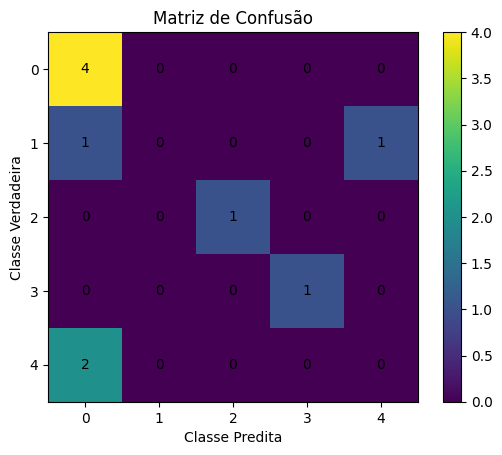

In [9]:
#Parte 6: Análises e geração de dados e Matriz de Confusão

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print("Precisão: ",accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn, zero_division=0))


cm = confusion_matrix(y_test, pred_knn)
plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [12]:
#Parte 7: Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("Precisão (Arvore de Decisão): ",accuracy_score(y_test, pred_tree))

importancia = tree.feature_importances_

for feature, importance in sorted(zip(FEATURES, importancia), key=lambda x: -x[1]):
    print(f"{feature}: {importance:.3f}")

print("\nImportância das Features:", importancia)


Precisão (Arvore de Decisão):  0.5
HP: 0.526
Ataque: 0.258
Velocidade: 0.147
Defesa: 0.069

Importância das Features: [0.52575717 0.25828388 0.06893514 0.14702381]


In [29]:
#Parte 8: Apredizado da máquina

novo_pokemon = {
    "HP": 40,
    "Ataque": 40,
    "Defesa": 40,
    "Velocidade": 30
}

X_novo = pd.DataFrame([novo_pokemon], columns=FEATURES)
pred_idx = knn.predict(X_novo)[0]

try:
  pred_label = le.inverse_transform([pred_idx])[0]
except:
  pred_label = pred_idx

print("Previsão (KNN): ", pred_label)

if hasattr(knn, "predict_proba"):
    probs = knn.predict_proba(X_novo)[0]
    try:
      print({cls: float(prob) for cls, prob in zip(le.classes_, probs)})
    except:
      print({int(cls): float(prob) for cls, prob in enumerate(probs)})


Previsão (KNN):  Muito_facil
{0: 0.3333333333333333, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.6666666666666666}


In [30]:
#Parte 9: Prevendo o novo pokémon com o pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_scaled = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])
knn_scaled.fit(X_train, y_train)


pred_idx = knn_scaled.predict(X_novo)[0]
try:
    pred_label = le.inverse_transform([pred_idx])[0]
except:
    pred_label = pred_idx

print("Previsão (KNN + escala):", pred_label)

if hasattr(knn_scaled, "predict_proba"):
    probs = knn_scaled.predict_proba(X_novo)[0]
    try:
        print({cls: float(p) for cls, p in zip(le.classes_, probs)})
    except:
        print({int(cls): float(p) for cls, p in enumerate(probs)})


Previsão (KNN + escala): Muito_facil
{0: 0.3333333333333333, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.6666666666666666}
